# Import Libraries

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Bidirectional
from keras import callbacks
import matplotlib.pyplot as plt
import numpy as np
import time
import joblib

# Analysis of dataset

In [3]:
max_features = 10000
maxlen = 500

In [4]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
x_train = pad_sequences(input_train, maxlen=maxlen)
x_test = pad_sequences(input_test, maxlen=maxlen)

## Distribution

In [6]:
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribution of classes in training data:", class_distribution)

Distribution of classes in training data: {0: 12500, 1: 12500}


## Length of reviews

In [7]:
review_lengths = [len(review) for review in input_train]
print(f'Mean length: {np.mean(review_lengths)}')
print(f'Min lenght: {np.min(review_lengths)}')
print(f'Max lenght: {np.max(review_lengths)}')

Mean length: 238.71364
Min lenght: 11
Max lenght: 2494


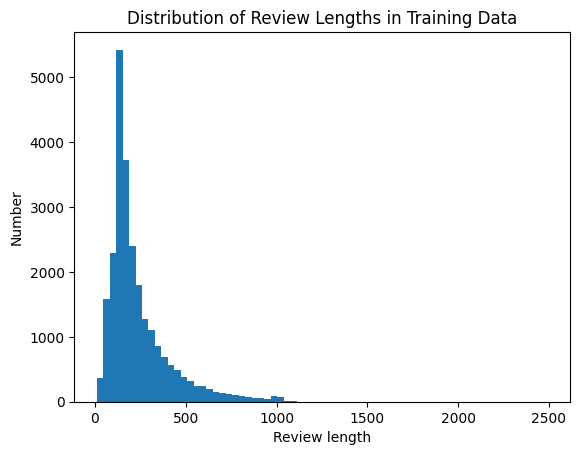

In [8]:
plt.hist(review_lengths, bins=70)
plt.xlabel('Review length')
plt.ylabel('Number')
plt.title('Distribution of Review Lengths in Training Data')
plt.show()

# Train model

In [9]:
histories = {}
models = {}
results = {}

In [10]:
def get_callbacks():

    early_stopping_acc = callbacks.EarlyStopping(
        monitor="val_accuracy", patience=7, verbose=1, restore_best_weights=True
    )

    early_stopping_loss = callbacks.EarlyStopping(
        monitor="val_loss",
        patience=7,
        verbose=1,
        start_from_epoch=4,
    )

    return [early_stopping_acc, early_stopping_loss]


def train(model, model_name, optimizer="adam", epochs=30, batch_size=64, validation_split=0.2):

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    start_time = time.time()

    history = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        callbacks=get_callbacks(),
    )

    end_time = time.time()

    training_time = end_time - start_time

    eval = model.evaluate(x_test, y_test)

    res = {
        "Training time": training_time,
        "Test accurancy": eval[1],
        "Test loss": eval[0],
    }

    models[model_name], histories[model_name], results[model_name] = model, history.history, res

## RNN

In [11]:
model_name = 'RNN'
model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, 'sigmoid')
], name = model_name)

train(model, model_name)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - accuracy: 0.5689 - loss: 0.6742 - val_accuracy: 0.7828 - val_loss: 0.4801
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.8338 - loss: 0.3858 - val_accuracy: 0.8424 - val_loss: 0.3845
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.9098 - loss: 0.2410 - val_accuracy: 0.8358 - val_loss: 0.4213
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.9653 - loss: 0.1128 - val_accuracy: 0.8240 - val_loss: 0.4793
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.9840 - loss: 0.0564 - val_accuracy: 0.7988 - val_loss: 0.6399
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.9932 - loss: 0.0296 - val_accuracy: 0.8016 - val_loss: 0.6264
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.9731 - loss: 0.0730 - val_accuracy: 0.7930 - val_loss: 0.6485
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.9908 - loss: 0.0314 - 

## GRU

In [12]:
model_name = 'GRU'
model = Sequential([
    Embedding(max_features, 32),
    GRU(32),
    Dense(1, 'sigmoid')
], name = model_name)

train(model, model_name)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 165ms/step - accuracy: 0.6593 - loss: 0.5850 - val_accuracy: 0.8462 - val_loss: 0.3603
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 161ms/step - accuracy: 0.8968 - loss: 0.2670 - val_accuracy: 0.8670 - val_loss: 0.3360
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 170ms/step - accuracy: 0.9243 - loss: 0.2014 - val_accuracy: 0.8564 - val_loss: 0.3399
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 179ms/step - accuracy: 0.9390 - loss: 0.1641 - val_accuracy: 0.8702 - val_loss: 0.3480
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.9625 - loss: 0.1099 - val_accuracy: 0.8774 - val_loss: 0.3764
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 158ms/step - accuracy: 0.9716 - loss: 0.0870 - val_accuracy: 0.8536 - val_loss: 0.4168
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.9812 - loss: 0.0613 - val_accuracy: 0.8516 - val_loss: 0.5037
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 156ms/step - accuracy: 0.9794 - loss: 0

## LSTM

In [13]:
model_name = 'LSTM'
model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, 'sigmoid')
], name = model_name)

train(model, model_name)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - accuracy: 0.6895 - loss: 0.5665 - val_accuracy: 0.8156 - val_loss: 0.4144
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - accuracy: 0.8703 - loss: 0.3209 - val_accuracy: 0.8672 - val_loss: 0.3247
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 115ms/step - accuracy: 0.9167 - loss: 0.2198 - val_accuracy: 0.8686 - val_loss: 0.3136
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.9446 - loss: 0.1612 - val_accuracy: 0.8726 - val_loss: 0.3291
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.9484 - loss: 0.1391 - val_accuracy: 0.8600 - val_loss: 0.3946
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.9623 - loss: 0.1100 - val_accuracy: 0.8662 - val_loss: 0.3667
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.9644 - loss: 0.1077 - val_accuracy: 0.7988 - val_loss: 0.4524
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.9610 - loss: 0

## Bidirectional LSTM

In [14]:
model_name = 'Bidirectional_LSTM'
model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32)),
    Dense(1, 'sigmoid')
], name = model_name)

train(model, model_name)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 150ms/step - accuracy: 0.6590 - loss: 0.6004 - val_accuracy: 0.8276 - val_loss: 0.4005
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 148ms/step - accuracy: 0.8704 - loss: 0.3211 - val_accuracy: 0.8550 - val_loss: 0.3510
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 152ms/step - accuracy: 0.9172 - loss: 0.2209 - val_accuracy: 0.8704 - val_loss: 0.3173
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.9429 - loss: 0.1658 - val_accuracy: 0.8746 - val_loss: 0.3316
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 161ms/step - accuracy: 0.9558 - loss: 0.1310 - val_accuracy: 0.8276 - val_loss: 0.3843
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 158ms/step - accuracy: 0.9559 - loss: 0.1293 - val_accuracy: 0.8810 - val_loss: 0.3912
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 162ms/step - accuracy: 0.9667 - loss: 0.1015 - val_accuracy: 0.8590 - val_loss: 0.3932
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 157ms/step - accuracy: 0.9725 - loss: 0

## Deep LSTM

In [15]:
model_name = 'Deep_LSTM'
model = Sequential([
    Embedding(max_features, 32),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, 'sigmoid')
], name = model_name)

train(model, model_name)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 250ms/step - accuracy: 0.6986 - loss: 0.5482 - val_accuracy: 0.8574 - val_loss: 0.3342
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 241ms/step - accuracy: 0.9055 - loss: 0.2449 - val_accuracy: 0.8808 - val_loss: 0.2922
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 242ms/step - accuracy: 0.9394 - loss: 0.1747 - val_accuracy: 0.8624 - val_loss: 0.3190
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 243ms/step - accuracy: 0.9562 - loss: 0.1293 - val_accuracy: 0.8750 - val_loss: 0.3740
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 242ms/step - accuracy: 0.9687 - loss: 0.0920 - val_accuracy: 0.8298 - val_loss: 0.4675
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 242ms/step - accuracy: 0.9715 - loss: 0.0837 - val_accuracy: 0.8588 - val_loss: 0.5017
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 231ms/step - accuracy: 0.9834 - loss: 0.0537 - val_accuracy: 0.8638 - val_loss: 0.5170
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 229ms/step - accuracy: 0.9870 - loss: 0

# Compare results

In [16]:
joblib.dump(histories, 'Results\\RNN\\histories.pkl')
joblib.dump(results, 'Results\\RNN\\results.pkl')
for model_name, model in models.items():
    model.save(f'Models\\RNN\\{model_name}.keras')